# Importing kaggle json file in collab

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manassingh2622","key":"a1a6c2e020c0b342bebca46670e3168e"}'}

# Installing kaggle

In [ ]:
!pip install -q kaggle

# Creating directories in collab

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Creating dog_dataset directory

In [4]:
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


# Listing the datasets from dogbreedidfromcomp

In [5]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           5527          8  0.1764706        


# Downloading the dataset

In [6]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

 98% 680M/691M [00:07<00:00, 125MB/s]
100% 691M/691M [00:07<00:00, 96.0MB/s]
/content


# Unzipping the zip file and deleting the unwanted files

In [7]:
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

# Importing The Important Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

# Reading the label csv file 

In [9]:
labels_all = pd.read_csv("dog_dataset/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


# Counting all the labels in the labels file

In [10]:
breed_all = labels_all["breed"]
breed_counts = breed_all.value_counts()
breed_counts.head()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: count, dtype: int64

# Specifying names of the species for which i want to train my model

In [11]:
CLASS_NAMES = ['scottish_deerhound','afghan_hound','entlebucher','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
2,80,01ee3c7ff9bcaba9874183135877670e,entlebucher
3,88,021b5a49189665c0442c19b5b33e8cf1,entlebucher
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


# Normalizing the dataset

In [12]:
x_data = np.zeros((len(labels),224,224,3),dtype='float32')
# One Hot encoding
y_data = label_binarize(labels['breed'],classes=CLASS_NAMES)


# reading and converting images to numpy array and normalize dataset
for i in tqdm(range(len(labels))):
  img = image.load_img('dog_dataset/train/%s.jpg'%labels['id'][i],target_size=(224,224))
  img = image.img_to_array(img)
  x = np.expand_dims(img.copy(),axis=0)
  x_data[i]= x/255.0

  #Printing train and one hot encode shape & size
  print('\n Train Iamge Shape : ',x_data.shape,'size: {:,}'.format(x_data.size))
  print('\nOne-hot Encoded Output :',y_data.shape,'size : {:,}'.format(y_data.size))


  5%|▍         | 23/471 [00:00<00:04, 111.34it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

  7%|▋         | 35/471 [00:00<00:04, 104.49it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 12%|█▏        | 57/471 [00:00<00:04, 85.80it/s] 


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 17%|█▋        | 78/471 [00:00<00:04, 92.36it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 19%|█▊        | 88/471 [00:00<00:04, 85.64it/s]

(471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688



 23%|██▎       | 106/471 [00:01<00:04, 77.66it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 26%|██▋       | 124/471 [00:01<00:04, 80.91it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 31%|███       | 146/471 [00:01<00:03, 94.41it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 35%|███▌      | 166/471 [00:01<00:03, 92.14it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 41%|████      | 192/471 [00:02<00:02, 108.24it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 45%|████▌     | 214/471 [00:02<00:02, 105.69it/s]

size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (

 48%|████▊     | 225/471 [00:02<00:02, 94.25it/s] 

 (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688


 52%|█████▏    | 244/471 [00:02<00:02, 80.49it/s]

 (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688


 57%|█████▋    | 270/471 [00:02<00:01, 101.90it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 62%|██████▏   | 293/471 [00:03<00:01, 103.67it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 67%|██████▋   | 315/471 [00:03<00:01, 105.39it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 69%|██████▉   | 326/471 [00:03<00:01, 98.91it/s] 

 size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Ou

 75%|███████▍  | 351/471 [00:03<00:01, 109.14it/s]

(471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge S

 80%|████████  | 377/471 [00:03<00:00, 115.72it/s]


One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) si

 85%|████████▌ | 401/471 [00:04<00:00, 110.73it/s]

(471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688



 88%|████████▊ | 413/471 [00:04<00:00, 99.08it/s] 


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 92%|█████████▏| 434/471 [00:04<00:00, 87.75it/s]


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224

 97%|█████████▋| 455/471 [00:04<00:00, 94.45it/s]

 (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688


100%|██████████| 471/471 [00:04<00:00, 95.94it/s] 


 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884

 Train Iamge Shape :  (471, 224, 224, 3) size: 70,898,688

One-hot Encoded Output : (471, 4) size : 1,884


# Building the model

In [13]:
model = Sequential()
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(7,7), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(len(CLASS_NAMES), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 32)      51232     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 52, 52, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 32)       

# Splitting the dataset into train, test and val

In [14]:
#Splitting the dataset into training and testing datasets
x_train_and_val, x_test, y_train_and_val, y_test = train_test_split(x_data,y_data , test_size = 0.1)


#splitting the training dataset into training and validation sets
x_train, x_val , y_train, y_val = train_test_split(x_train_and_val,y_train_and_val, test_size = 0.2)


# Executing the model

In [ ]:
#epochs = 100
#batch_size = 128

history = model.fit(x_train , y_train, batch_size = 128, epochs = 100 , validation_data = (x_val,y_val))

Epoch 1/100
3/3 [==============================] - 1s 362ms/step - loss: 1.3544 - accuracy: 0.7633 - val_loss: 3.4043 - val_accuracy: 0.6118
Epoch 2/100
3/3 [==============================] - 1s 258ms/step - loss: 2.8047 - accuracy: 0.6331 - val_loss: 0.8288 - val_accuracy: 0.8000
Epoch 3/100
3/3 [==============================] - 1s 264ms/step - loss: 1.2122 - accuracy: 0.6775 - val_loss: 1.0830 - val_accuracy: 0.6941
Epoch 4/100
3/3 [==============================] - 1s 288ms/step - loss: 0.8824 - accuracy: 0.7870 - val_loss: 0.9606 - val_accuracy: 0.7412
Epoch 5/100
3/3 [==============================] - 1s 258ms/step - loss: 0.7760 - accuracy: 0.7751 - val_loss: 0.7409 - val_accuracy: 0.8353
Epoch 6/100
3/3 [==============================] - 1s 276ms/step - loss: 0.6861 - accuracy: 0.8787 - val_loss: 0.7672 - val_accuracy: 0.8118
Epoch 7/100
3/3 [==============================] - 1s 302ms/step - loss: 0.6148 - accuracy: 0.9172 - val_loss: 0.7529 - val_accuracy: 0.8353
Epoch 8/100
3

# Plotting the graph of model accuracy

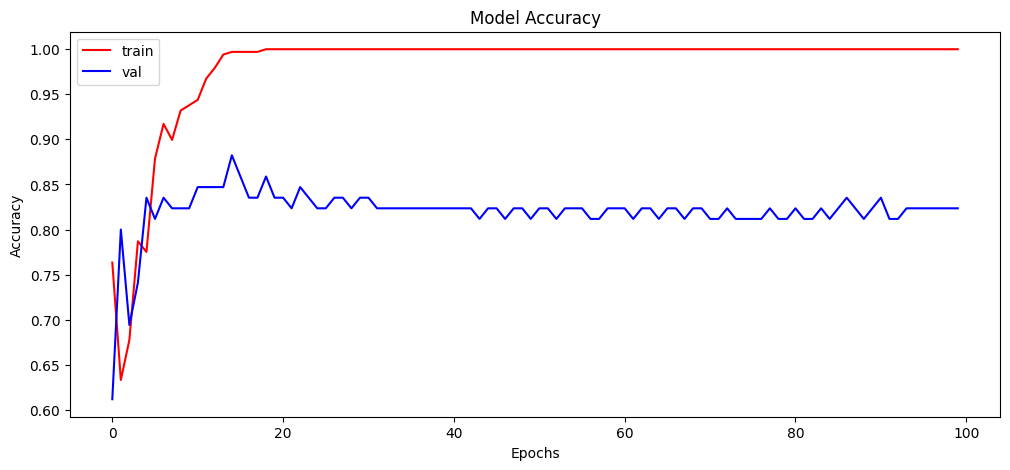

In [ ]:
#Plot the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

# Predicting the model accuracy on the test data

In [ ]:
y_pred = model.predict(x_test)
score = model.evaluate(x_test,y_test)
print('Accuracy over the test set : \n',round((score[1]*100),2),'%')


2/2 [==============================] - 0s 21ms/step - loss: 0.6361 - accuracy: 0.8750
Accuracy over the test set : 
 87.5 %


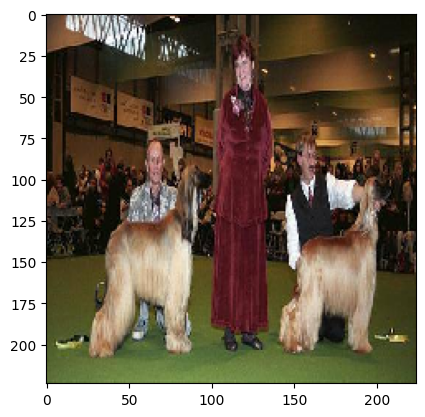

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [ ]:
#PLOTTING IMAGE TO COMPARE
plt.imshow(x_test[1,:,:,:])
plt.show()

#Finding max value from prediction and comparing original values vs predicted
print("Originally : ",labels['breed'][np.argmax(y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(y_pred[1])])

In [ ]:
model.save("dog_breed_prediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
